TRAIN DEEP LEARNING MODEL

### step-1 Load the preprocess data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# Projenin rootunu src'den bir kademe yukarıya çek
project_root = 'C:/Users/mertt/PycharmProjects/mask-detection-project'


In [3]:
# Çalışan dosya dizinini roota çek
os.chdir(project_root)
print("Çalışan dosya dizini:", os.getcwd())

Çalışan dosya dizini: C:\Users\mertt\PycharmProjects\mask-detection-project


In [4]:
#Load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [5]:
X =data ['arr_0']
y = data['arr_1']

In [6]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [7]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

### Preprocessing "y"

In [8]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1, 1))

In [12]:
y_array = y_onehot.toarray()

In [15]:
y_array.shape
#1st column belongst o mask 1 or 0 etc for categories
#mask chin
#mask mouth chin
#mask nose chin mouth

(9959, 4)

### Split the Data into Train and Test sets

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_array, test_size=0.2, random_state=42)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

### DEEP LEARNING MODEL
![Description of image](../architecture.png)



In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [19]:
# convolutional neural network

model = Sequential([
    layers.Conv2D(16, 3, padding='same', input_shape=(100, 100, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='sigmoid')
])

#compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0

In [23]:
# Training CNN,, memory error alırsan batch_sizeyi düşür!
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=30, epochs=10)

Epoch 1/10
266/266 [==============================] - 41s 148ms/step - loss: 0.2265 - accuracy: 0.9208 - val_loss: 0.1130 - val_accuracy: 0.9674
Epoch 2/10
266/266 [==============================] - 44s 164ms/step - loss: 0.0700 - accuracy: 0.9768 - val_loss: 0.0846 - val_accuracy: 0.9704
Epoch 3/10
266/266 [==============================] - 42s 160ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0561 - val_accuracy: 0.9799
Epoch 4/10
266/266 [==============================] - 42s 158ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0540 - val_accuracy: 0.9824
Epoch 5/10
266/266 [==============================] - 41s 155ms/step - loss: 0.0283 - accuracy: 0.9900 - val_loss: 0.0517 - val_accuracy: 0.9804
Epoch 6/10
266/266 [==============================] - 38s 141ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0844 - val_accuracy: 0.9779
Epoch 7/10
266/266 [==============================] - 38s 142ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0436 - val_ac

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
history_df = pd.DataFrame(history.history)

In [26]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.226535,0.920798,0.113018,0.967369
1,0.070034,0.976779,0.084562,0.970381
2,0.047400,0.985189,0.056054,0.979920
3,0.032472,0.989205,0.053997,0.982430
4,0.028330,0.989959,0.051702,0.980422
5,0.020207,0.993473,0.084436,0.977912
6,0.007555,0.997741,0.043614,0.989960
7,0.005604,0.998368,0.055759,0.987450
8,0.018499,0.994101,0.057664,0.984940
9,0.008886,0.996988,0.054318,0.987952


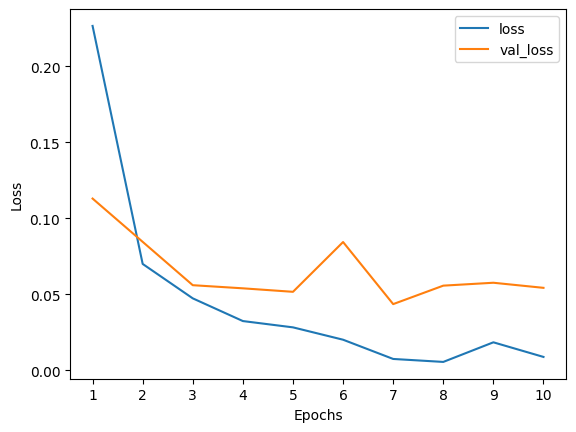

In [29]:
history_df[['loss', 'val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)), list(range(1, 11)))
plt.show()

# Our model is not overfit.train and validation loss as we can see is decreasing.

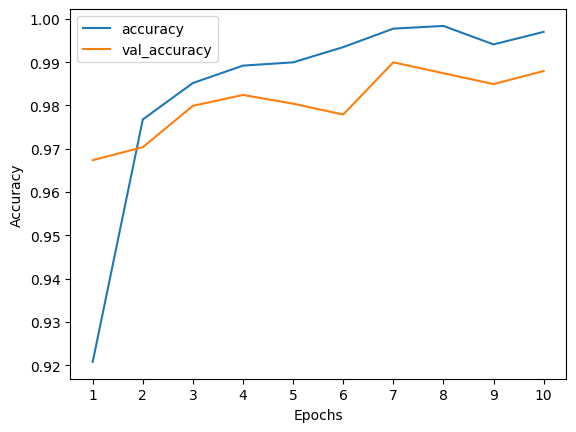

In [30]:
history_df[['accuracy', 'val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)), list(range(1, 11)))
plt.show()

In [31]:
# Save CNN Model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


In [32]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]